In [20]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import utils.rd_plot_functions as rdpf
import utils.plot_functions as pf
import utils.data_processing as dp
from utils.bases import *
import numpy as np

# Load in data

In [22]:
lpf_dir = "/media/tbell/sanborn/rd_analysis/inputs/vh_test_lpf2.npz"

In [23]:
with np.load(lpf_dir) as d:
    lpf = d['arr_0'].item()['train'].images

# Mean and var

In [24]:
print(np.mean(lpf))
print(np.std(lpf))

-2.74092508341e-08
0.0445811601689


# Visualize

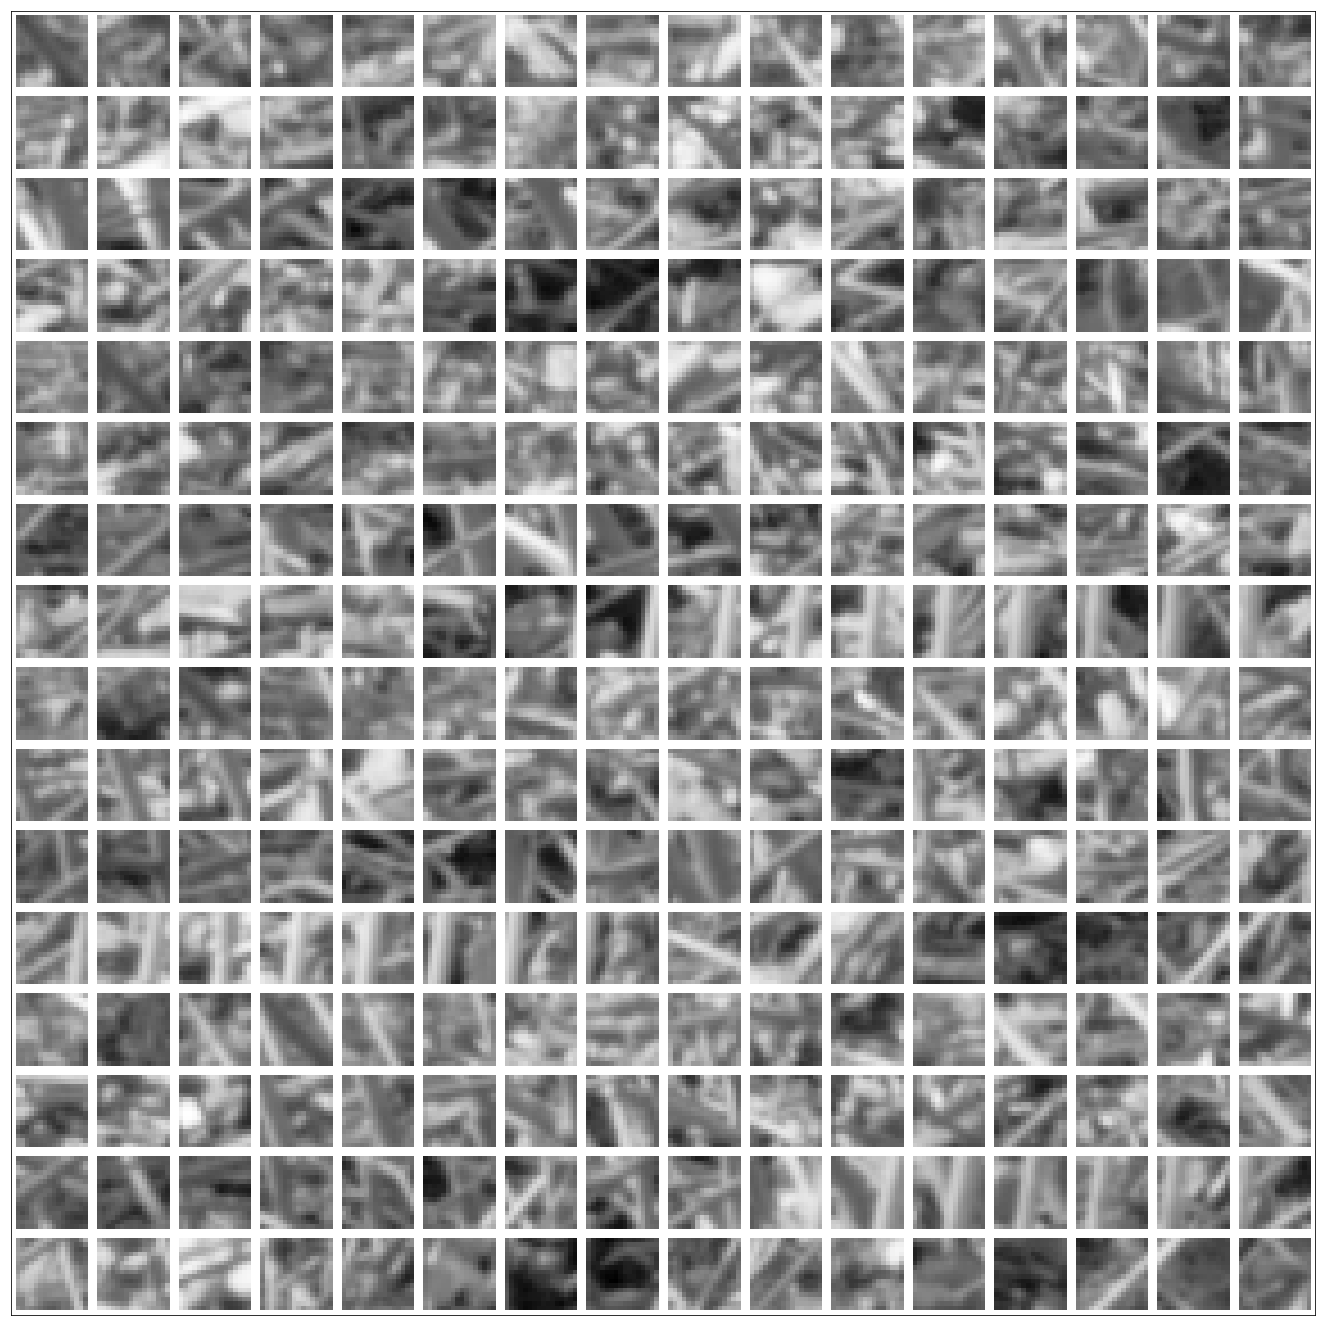

In [25]:
pf.plot_data_tiled(lpf[:256]);

# PCA basis

In [26]:
PCA_weights, PCA_coeffs = PCA(lpf)

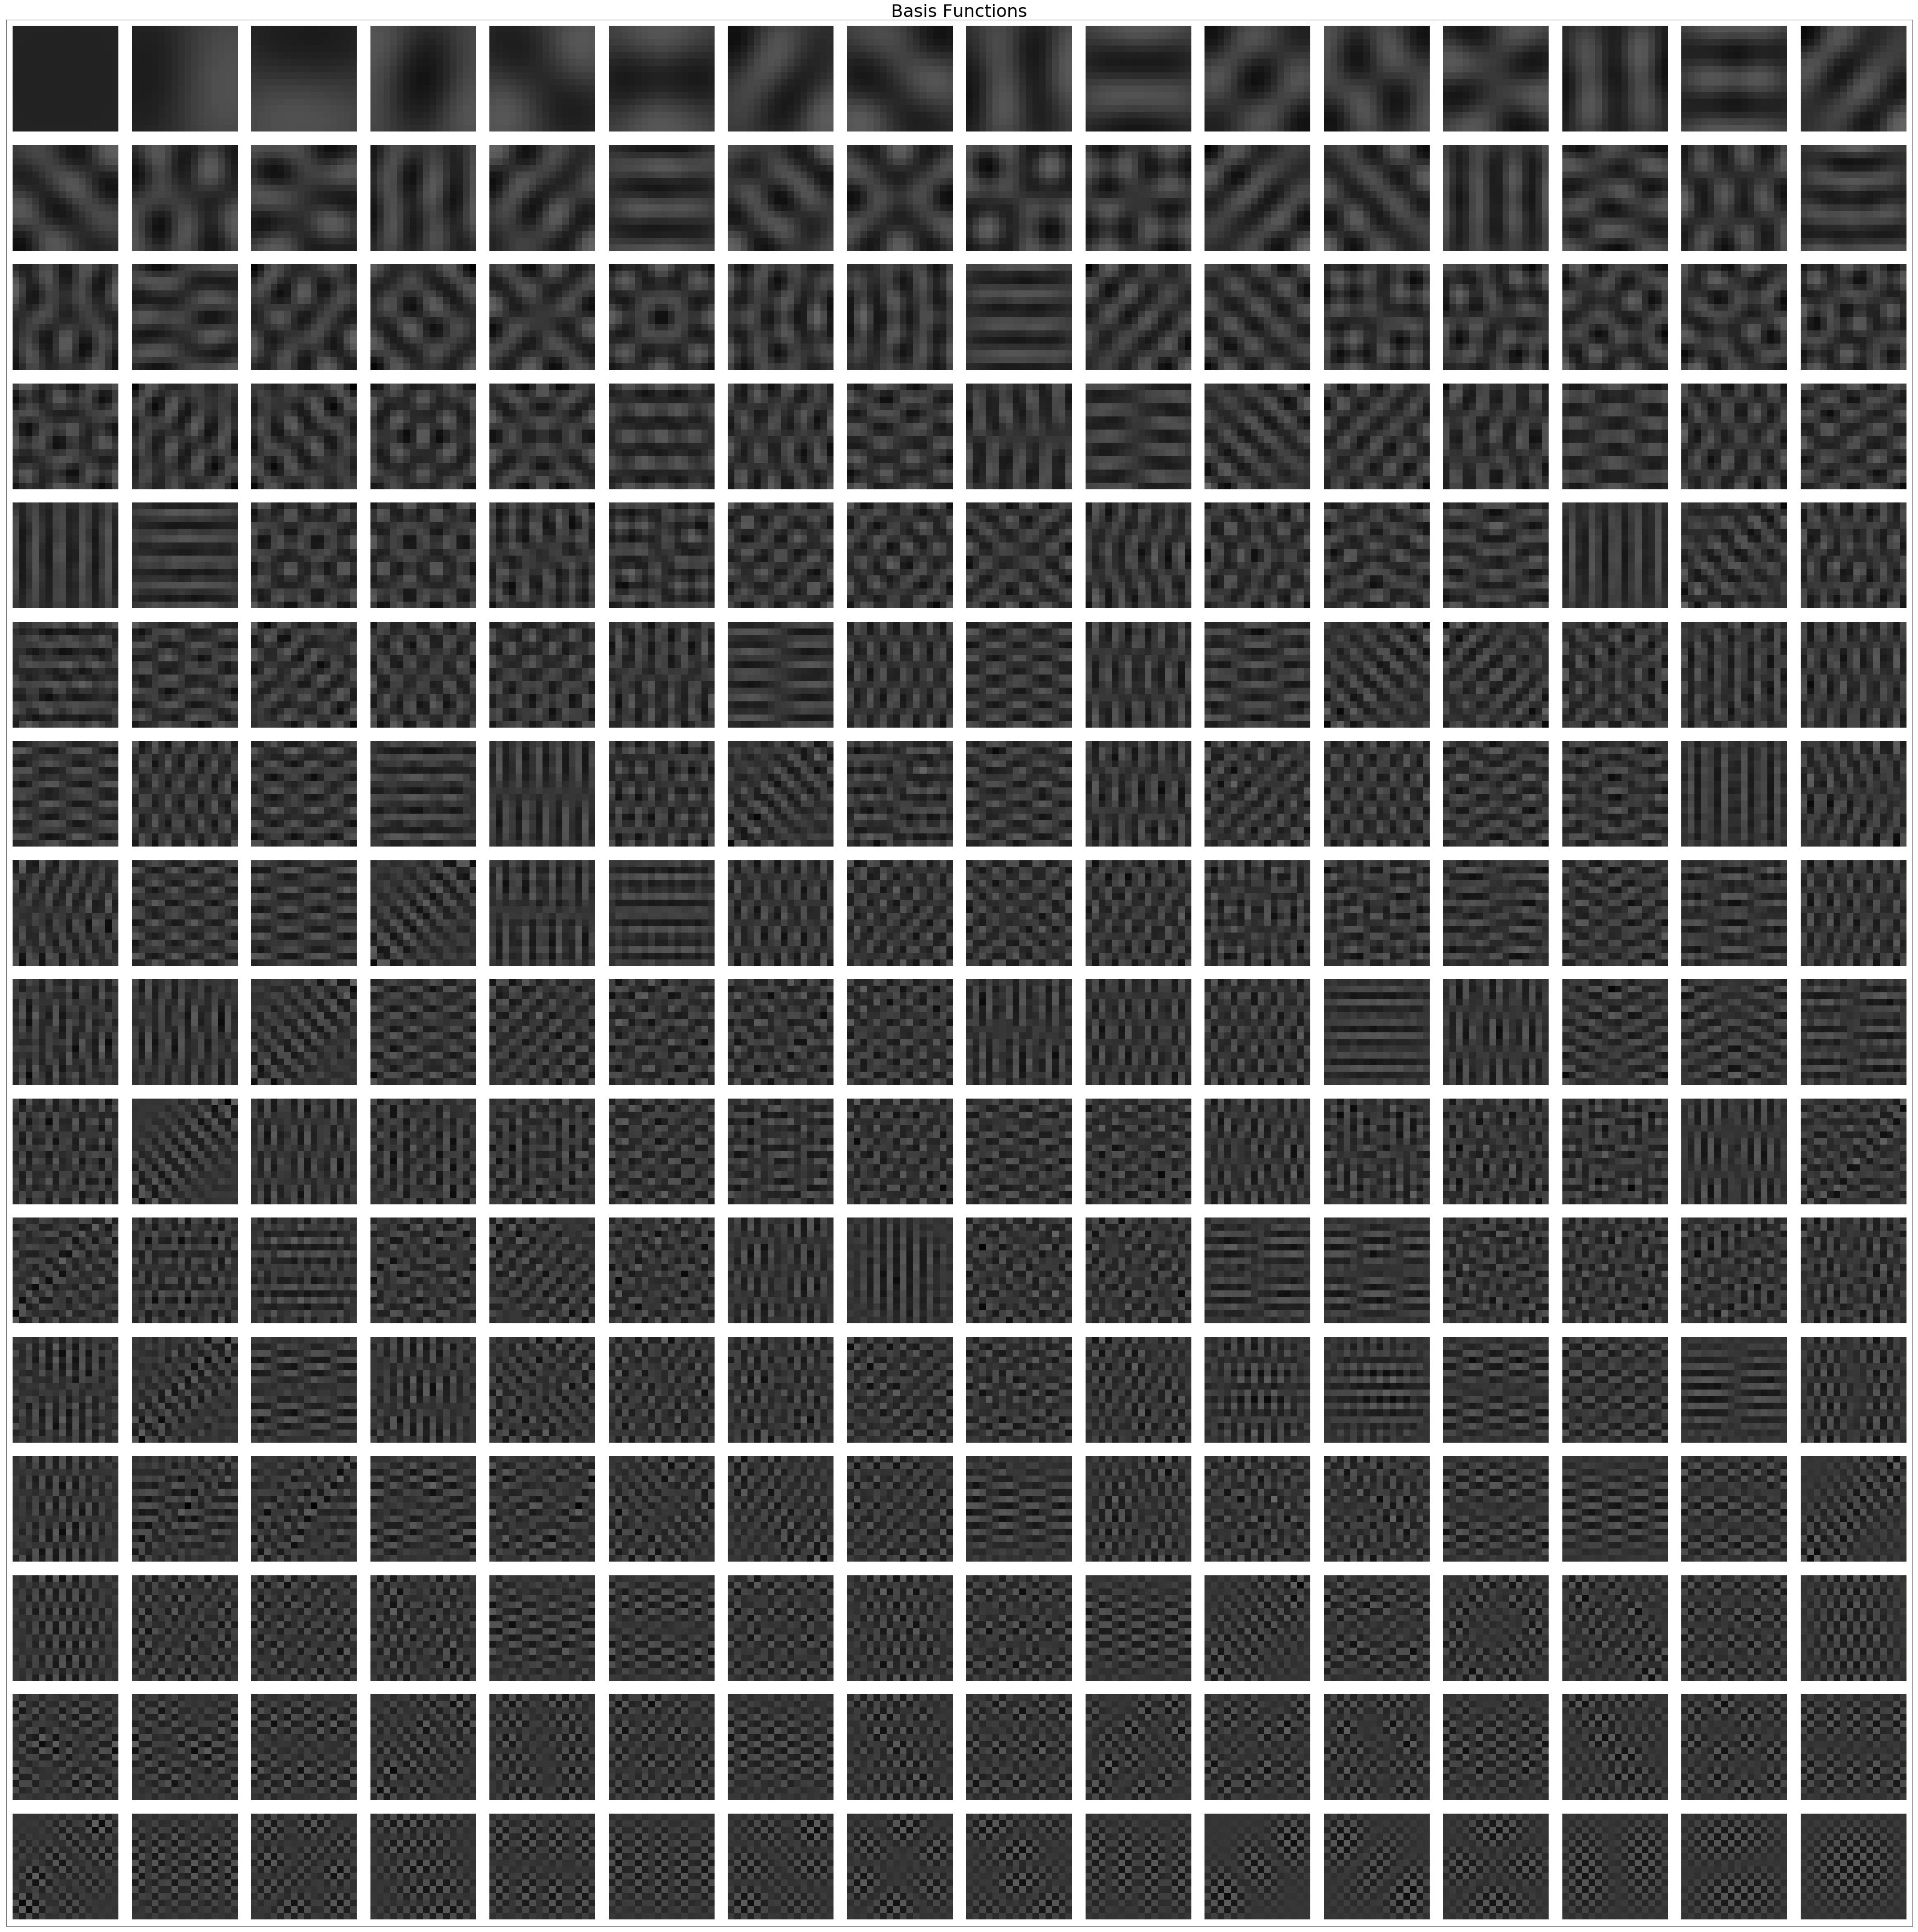

In [27]:
rdpf.plot_bases(PCA_weights)

In [28]:
PCA_recons = recon(PCA_weights, PCA_coeffs, 0)

In [29]:
np.mean((lpf- PCA_recons)**2)

1.7248758467533044e-31

In [30]:
np.min(PCA_coeffs)

-2.3036787812495376

In [31]:
np.max(PCA_coeffs)

4.0422913499382132

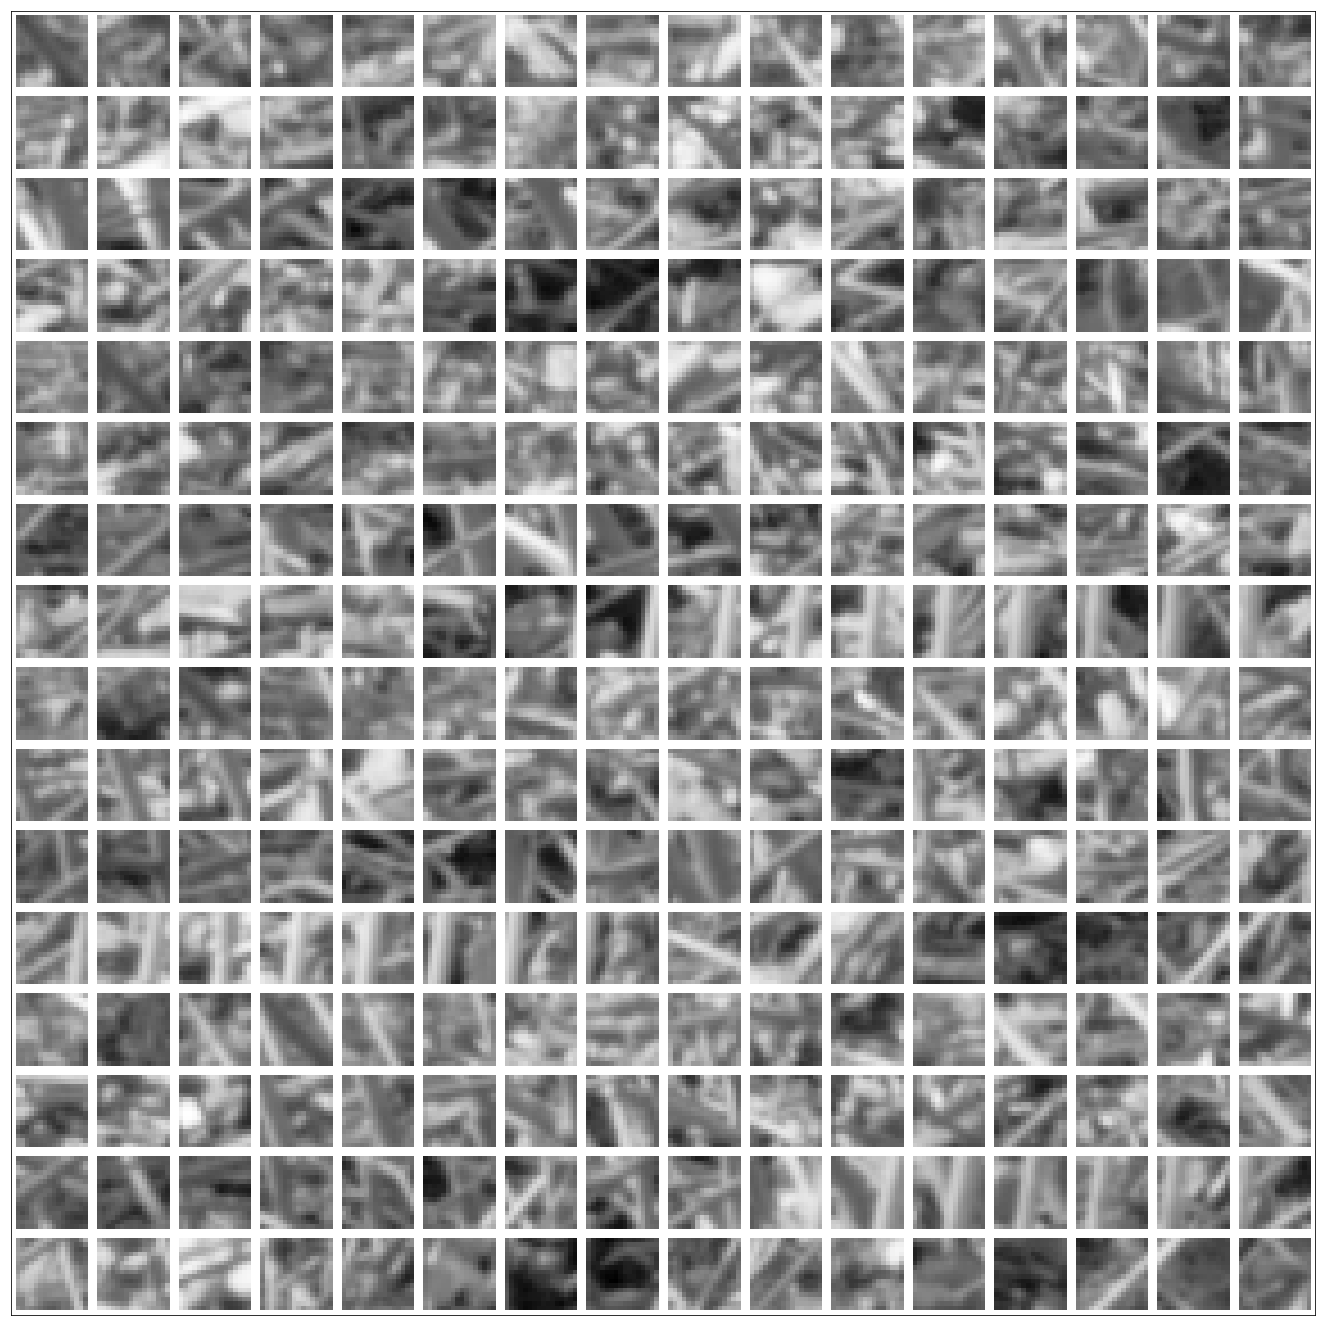

In [32]:
pf.plot_data_tiled(PCA_recons[:256]);

In [33]:
np.savez('/media/tbell/sanborn/rd_analysis/outputs/pca/coeffs/pca_weights.npz', PCA_weights)

In [34]:
np.savez('/media/tbell/sanborn/rd_analysis/outputs/pca/coeffs/pca_coeffs.npz', PCA_coeffs)